In [126]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import statsmodels.api as sm
import pylab as py
from plotly.subplots import make_subplots
from sklearn import preprocessing
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import shap

import pandas as pd
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import Hyperband

import pandas as pd
df = pd.read_csv('C:\\Users\\SUSNATA BISWAS\\OneDrive\\Desktop\\UAV.csv')

In [127]:
df.head(10)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,uvindex,severerisk,conditions,icon,stations,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,"Birmingham, England, United Kingdom",6/1/2022,8.5,8,6.7,88.53,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",69.0,0.281703,22.382043,2.566546,24.11447322
1,"Birmingham, England, United Kingdom",6/1/2022,6.8,6.8,6.3,96.41,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",340.0,-0.900007,28.187742,10.483025,22.11221897
2,"Birmingham, England, United Kingdom",6/1/2022,6.2,6.2,5.8,97.67,0,0,NaN,0,...,0,10,Clear,clear-night,"03529099999,03414099999,EGBB,03535099999,03534...",266.0,-0.688493,29.375444,1.553021,24.97105023
3,"Birmingham, England, United Kingdom",6/1/2022,5.5,4.6,5.3,98.46,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",18.0,0.635886,23.710883,13.169636,26.51038418
4,"Birmingham, England, United Kingdom",6/1/2022,6,6,5.8,98.6,0,0,NaN,0,...,0,10,Overcast,cloudy,"03529099999,03414099999,EGBB,03535099999,03534...",35.0,0.526626,20.025423,14.554085,21.45772112
5,"Birmingham, England, United Kingdom",6/1/2022,7.1,7.1,7,98.95,0.02,100,rain,0,...,0,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",358.0,-0.908703,26.219584,11.742752,19.3975562
6,"Birmingham, England, United Kingdom",6/1/2022,8.4,7.3,8.2,98.81,0.02,100,rain,0,...,0,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",224.0,-0.661019,20.292279,12.470840,12.9191122
7,"Birmingham, England, United Kingdom",6/1/2022,9.4,8.9,8.8,96.14,0.02,100,rain,0,...,1,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",111.0,0.317224,23.896022,14.545962,23.90359735
8,"Birmingham, England, United Kingdom",6/1/2022,10.9,10.9,9,88.14,0.02,100,rain,0,...,2,10,"Rain, Partially cloudy",rain,"03529099999,EGBB,03647099999,03535099999,03534...",279.0,0.454431,20.007064,2.977960,25.38914851
9,"Birmingham, England, United Kingdom",6/1/2022,11,11,8.8,86.8,0.02,100,rain,0,...,2,10,"Rain, Overcast",rain,"03529099999,03414099999,EGBB,03647099999,03535...",360.0,0.346707,26.105161,5.923844,29.61544896


In [128]:
df = df.drop(['name','datetime','stations','preciptype','precipprob','solarenergy'] , axis = 1)
df

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,...,solarradiation,uvindex,severerisk,conditions,icon,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,8,6.7,88.53,0,0,0,7.90,5.40,270,...,0,0,10,Partially cloudy,partly-cloudy-night,69.0,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.8,6.3,96.41,0,0,0,5.10,3.20,286,...,0,0,10,Partially cloudy,partly-cloudy-night,340.0,-0.900007,28.187742,10.483025,22.11221897
2,6.2,6.2,5.8,97.67,0,0,0,6.20,4.30,195,...,0,0,10,Clear,clear-night,266.0,-0.688493,29.375444,1.553021,24.97105023
3,5.5,4.6,5.3,98.46,0,0,0,8.90,5.30,192,...,0,0,10,Partially cloudy,partly-cloudy-night,18.0,0.635886,23.710883,13.169636,26.51038418
4,6,6,5.8,98.6,0,0,0,7.90,4.30,174,...,0,0,10,Overcast,cloudy,35.0,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,14.6,11.3,80.59,1.3,0,0,30.20,16.90,206.9,...,370,4,10,Overcast,cloudy,79.0,-0.784794,28.608596,4.485393,8.161947594
597,13.6,13.6,10.9,83.73,0,0,0,31.40,15.70,205.9,...,272.3,3,10,Partially cloudy,partly-cloudy-day,308.0,-0.715012,24.484307,3.080164,6.761283669
598,12.6,12.6,10.4,87.04,0,0,0,32.60,14.50,204.9,...,174.7,2,10,Partially cloudy,partly-cloudy-day,208.0,-0.109373,25.770818,5.489982,22.28967933
599,11.6,11.6,10.1,90.51,0.1,0,0,33.80,13.30,203.9,...,77,0,10,Clear,clear-night,205.0,-0.710821,27.896114,9.099070,10.33508325


In [129]:
df = df.dropna()
df

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,...,solarradiation,uvindex,severerisk,conditions,icon,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,8,6.7,88.53,0,0,0,7.90,5.40,270,...,0,0,10,Partially cloudy,partly-cloudy-night,69.0,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.8,6.3,96.41,0,0,0,5.10,3.20,286,...,0,0,10,Partially cloudy,partly-cloudy-night,340.0,-0.900007,28.187742,10.483025,22.11221897
2,6.2,6.2,5.8,97.67,0,0,0,6.20,4.30,195,...,0,0,10,Clear,clear-night,266.0,-0.688493,29.375444,1.553021,24.97105023
3,5.5,4.6,5.3,98.46,0,0,0,8.90,5.30,192,...,0,0,10,Partially cloudy,partly-cloudy-night,18.0,0.635886,23.710883,13.169636,26.51038418
4,6,6,5.8,98.6,0,0,0,7.90,4.30,174,...,0,0,10,Overcast,cloudy,35.0,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,14.6,11.3,80.59,1.3,0,0,30.20,16.90,206.9,...,370,4,10,Overcast,cloudy,79.0,-0.784794,28.608596,4.485393,8.161947594
597,13.6,13.6,10.9,83.73,0,0,0,31.40,15.70,205.9,...,272.3,3,10,Partially cloudy,partly-cloudy-day,308.0,-0.715012,24.484307,3.080164,6.761283669
598,12.6,12.6,10.4,87.04,0,0,0,32.60,14.50,204.9,...,174.7,2,10,Partially cloudy,partly-cloudy-day,208.0,-0.109373,25.770818,5.489982,22.28967933
599,11.6,11.6,10.1,90.51,0.1,0,0,33.80,13.30,203.9,...,77,0,10,Clear,clear-night,205.0,-0.710821,27.896114,9.099070,10.33508325


In [130]:
df['temp'] = pd.to_numeric(df['temp'])
df['dew'] = pd.to_numeric(df['dew'])
df['humidity'] = pd.to_numeric(df['humidity'])
df['precip'] = pd.to_numeric(df['precip'])
df['windspeed'] = pd.to_numeric(df['windspeed'])
df['snowdepth'] = pd.to_numeric(df['snowdepth'])
df['sealevelpressure'] = pd.to_numeric(df['sealevelpressure'])
df['solarradiation'] = pd.to_numeric(df['solarradiation'])
df['uvindex'] = pd.to_numeric(df['uvindex'])
df['visibility'] = pd.to_numeric(df['visibility'])
df['cloudcover'] = pd.to_numeric(df['cloudcover'])
df['windgust'] = pd.to_numeric(df['windgust'])
df['Final UAV Speed'] = pd.to_numeric(df['Final UAV Speed'])
df['snow'] = pd.to_numeric(df['snow'])
df['winddir'] = pd.to_numeric(df['winddir'])
df['severerisk'] = pd.to_numeric(df['severerisk'])

In [131]:
df1 = df.drop(['snow','snowdepth','Gap angle','feelslike'], axis = 1)
df1

,temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,icon,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,88.53,0.0,7.9,5.4,270.0,1014.4,28.1,19.7,0.0,0,10,Partially cloudy,partly-cloudy-night,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,96.41,0.0,5.1,3.2,286.0,1015.0,20.5,16.6,0.0,0,10,Partially cloudy,partly-cloudy-night,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,97.67,0.0,6.2,4.3,195.0,1015.1,4.4,12.1,0.0,0,10,Clear,clear-night,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,98.46,0.0,8.9,5.3,192.0,1015.0,28.7,10.1,0.0,0,10,Partially cloudy,partly-cloudy-night,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,98.60,0.0,7.9,4.3,174.0,1014.4,92.3,13.1,0.0,0,10,Overcast,cloudy,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,80.59,1.3,30.2,16.9,206.9,1001.0,99.7,10.0,370.0,4,10,Overcast,cloudy,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,83.73,0.0,31.4,15.7,205.9,1001.3,73.1,14.7,272.3,3,10,Partially cloudy,partly-cloudy-day,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,87.04,0.0,32.6,14.5,204.9,1001.7,46.6,19.4,174.7,2,10,Partially cloudy,partly-cloudy-day,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,90.51,0.1,33.8,13.3,203.9,1002.0,20.0,24.1,77.0,0,10,Clear,clear-night,-0.710821,27.896114,9.099070,10.335083


In [132]:
df2 = df1.drop(['icon','severerisk','winddir','cloudcover'], axis = 1)
df2

,temp,dew,humidity,precip,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,conditions,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,88.53,0.0,7.9,5.4,1014.4,19.7,0.0,0,Partially cloudy,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,96.41,0.0,5.1,3.2,1015.0,16.6,0.0,0,Partially cloudy,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,97.67,0.0,6.2,4.3,1015.1,12.1,0.0,0,Clear,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,98.46,0.0,8.9,5.3,1015.0,10.1,0.0,0,Partially cloudy,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,98.60,0.0,7.9,4.3,1014.4,13.1,0.0,0,Overcast,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,80.59,1.3,30.2,16.9,1001.0,10.0,370.0,4,Overcast,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,83.73,0.0,31.4,15.7,1001.3,14.7,272.3,3,Partially cloudy,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,87.04,0.0,32.6,14.5,1001.7,19.4,174.7,2,Partially cloudy,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,90.51,0.1,33.8,13.3,1002.0,24.1,77.0,0,Clear,-0.710821,27.896114,9.099070,10.335083


In [133]:
df3 = df2.drop(['humidity','uvindex','sealevelpressure','solarradiation'], axis = 1)
df3

,temp,dew,precip,windgust,windspeed,visibility,conditions,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,0.0,7.9,5.4,19.7,Partially cloudy,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,0.0,5.1,3.2,16.6,Partially cloudy,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,0.0,6.2,4.3,12.1,Clear,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,0.0,8.9,5.3,10.1,Partially cloudy,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,0.0,7.9,4.3,13.1,Overcast,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,Overcast,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,0.0,31.4,15.7,14.7,Partially cloudy,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,0.0,32.6,14.5,19.4,Partially cloudy,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,0.1,33.8,13.3,24.1,Clear,-0.710821,27.896114,9.099070,10.335083


In [134]:
df3['conditions'].unique()

array(['Partially cloudy', 'Clear', 'Overcast', 'Rain, Partially cloudy',
       'Rain, Overcast'], dtype=object)

In [135]:
one_hot_encoded_data = pd.get_dummies(df3, columns = ['conditions'])

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


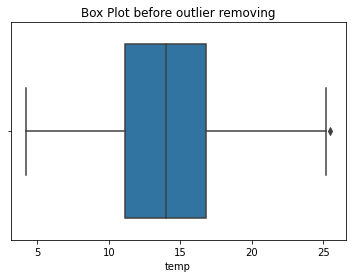

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


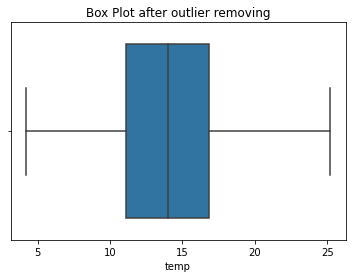

In [136]:
from matplotlib import pyplot as plt
sns.boxplot(one_hot_encoded_data['temp'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(one_hot_encoded_data, 'temp')
sns.boxplot(one_hot_encoded_data['temp'])
plt.title("Box Plot after outlier removing")
plt.show()

In [137]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['windspeed']:
        if i > q3 or i < q1:
            one_hot_encoded_data['windspeed'] = one_hot_encoded_data['windspeed'].replace(i, med)

In [138]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['windgust']:
        if i > q3 or i < q1:
            one_hot_encoded_data['windgust'] = one_hot_encoded_data['windgust'].replace(i, med)

In [139]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['visibility']:
        if i > q3 or i < q1:
            one_hot_encoded_data['visibility'] = one_hot_encoded_data['visibility'].replace(i, med)

In [140]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['UAV Speed']:
        if i > q3 or i < q1:
            one_hot_encoded_data['UAV Speed'] = one_hot_encoded_data['UAV Speed'].replace(i, med)

In [141]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['UAV Payload']:
        if i > q3 or i < q1:
            one_hot_encoded_data['UAV Payload'] = one_hot_encoded_data['UAV Payload'].replace(i, med)

In [142]:
one_hot_encoded_data

,temp,dew,precip,windgust,windspeed,visibility,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,8.5,6.7,0.0,7.9,5.4,19.7,0.281703,22.382043,2.566546,24.114473,0,0,1,0,0
1,6.8,6.3,0.0,5.1,3.2,16.6,-0.900007,28.187742,10.483025,22.112219,0,0,1,0,0
2,6.2,5.8,0.0,6.2,4.3,12.1,-0.688493,29.375444,1.553021,24.971050,1,0,0,0,0
3,5.5,5.3,0.0,8.9,5.3,10.1,0.635886,23.710883,13.169636,26.510384,0,0,1,0,0
4,6.0,5.8,0.0,7.9,4.3,13.1,0.526626,20.025423,14.554085,21.457721,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,-0.784794,28.608596,4.485393,8.161948,0,1,0,0,0
597,13.6,10.9,0.0,31.4,15.7,14.7,-0.715012,24.484307,3.080164,6.761284,0,0,1,0,0
598,12.6,10.4,0.0,32.6,14.5,19.4,-0.109373,25.770818,5.489982,22.289679,0,0,1,0,0
599,11.6,10.1,0.1,33.8,13.3,24.1,-0.710821,27.896114,9.099070,10.335083,1,0,0,0,0


In [143]:
import pandas as pd     

In [144]:
from sklearn import preprocessing

In [145]:
X = one_hot_encoded_data[['temp','dew','precip','windgust','windspeed','visibility','cos(gap angle)','UAV Speed','UAV Payload','conditions_Clear','conditions_Overcast','conditions_Partially cloudy','conditions_Rain, Overcast','conditions_Rain, Partially cloudy']]
y = one_hot_encoded_data['Final UAV Speed']

In [146]:
X

,temp,dew,precip,windgust,windspeed,visibility,cos(gap angle),UAV Speed,UAV Payload,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,8.5,6.7,0.0,7.9,5.4,19.7,0.281703,22.382043,2.566546,0,0,1,0,0
1,6.8,6.3,0.0,5.1,3.2,16.6,-0.900007,28.187742,10.483025,0,0,1,0,0
2,6.2,5.8,0.0,6.2,4.3,12.1,-0.688493,29.375444,1.553021,1,0,0,0,0
3,5.5,5.3,0.0,8.9,5.3,10.1,0.635886,23.710883,13.169636,0,0,1,0,0
4,6.0,5.8,0.0,7.9,4.3,13.1,0.526626,20.025423,14.554085,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,-0.784794,28.608596,4.485393,0,1,0,0,0
597,13.6,10.9,0.0,31.4,15.7,14.7,-0.715012,24.484307,3.080164,0,0,1,0,0
598,12.6,10.4,0.0,32.6,14.5,19.4,-0.109373,25.770818,5.489982,0,0,1,0,0
599,11.6,10.1,0.1,33.8,13.3,24.1,-0.710821,27.896114,9.099070,1,0,0,0,0


In [147]:
y

0      24.114473
1      22.112219
2      24.971050
3      26.510384
4      21.457721
         ...    
596     8.161948
597     6.761284
598    22.289679
599    10.335083
600    34.311301
Name: Final UAV Speed, Length: 599, dtype: float64

In [148]:
one_hot_encoded_data_final = one_hot_encoded_data.drop(['visibility','dew','precip','conditions_Partially cloudy','conditions_Overcast','conditions_Clear','conditions_Rain, Partially cloudy','conditions_Rain, Overcast'], axis = 1)

In [149]:
one_hot_encoded_data_final

,temp,windgust,windspeed,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,7.9,5.4,0.281703,22.382043,2.566546,24.114473
1,6.8,5.1,3.2,-0.900007,28.187742,10.483025,22.112219
2,6.2,6.2,4.3,-0.688493,29.375444,1.553021,24.971050
3,5.5,8.9,5.3,0.635886,23.710883,13.169636,26.510384
4,6.0,7.9,4.3,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...
596,14.6,30.2,16.9,-0.784794,28.608596,4.485393,8.161948
597,13.6,31.4,15.7,-0.715012,24.484307,3.080164,6.761284
598,12.6,32.6,14.5,-0.109373,25.770818,5.489982,22.289679
599,11.6,33.8,13.3,-0.710821,27.896114,9.099070,10.335083


In [150]:
X= one_hot_encoded_data_final[['temp','windgust','windspeed','cos(gap angle)','UAV Speed','UAV Payload']]
y = one_hot_encoded_data_final['Final UAV Speed']

In [151]:
from sklearn import preprocessing

X = preprocessing.scale(X)
y = preprocessing.scale(y)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [153]:
X_train

array([[-1.50732708,  0.94667093,  0.43996938, -0.72023142, -0.25435771,
         0.74303262],
       [-1.36788047,  0.76342949,  0.30781034, -1.30178312,  1.20569267,
         1.45127189],
       [-1.00531928, -0.40473464, -0.07214693,  1.39081873,  1.06140771,
        -0.60100555],
       ...,
       [ 0.30547887, -0.83229799, -1.06333978, -1.34796202,  0.34780902,
        -0.25165704],
       [-0.33597554, -0.25203345, -0.50166383, -1.40676819,  0.89439104,
         1.00598166],
       [-0.55909012,  0.67180878,  1.01816522, -1.0484008 , -0.97537289,
         0.52325004]])

In [154]:
y_train

array([-0.90936203, -1.3068345 ,  1.36323929, -0.16360679,  0.87369167,
        0.03011746, -0.51008304,  0.14354551,  0.51394104,  1.60294029,
        0.39120658,  0.97496225,  0.96852975,  0.12980635,  1.65036163,
       -1.72342365,  1.70409452,  0.5221263 ,  0.98796394,  1.242211  ,
        0.47819822, -1.39394792, -1.50170619,  1.26032186, -0.70401478,
       -2.16425466,  0.05455875, -0.2081173 , -0.04598527,  1.16845404,
       -1.4589938 , -0.78723521, -0.37400348,  0.55736381,  0.8574069 ,
        2.52163522,  0.11174556, -0.19850959, -1.31486731,  0.01199036,
        1.73105553, -0.08822078, -0.18514283,  1.23699353, -1.18044789,
        0.83117344, -0.01543719,  1.42649138, -1.44287894, -0.99404405,
       -1.55069712,  1.07102855, -0.3654624 , -0.61016647,  0.81581002,
       -0.1660757 ,  0.8089894 , -2.01043315,  0.99936404, -0.59037939,
        1.32749141, -1.39291788,  1.66107917, -0.16334272,  1.03771819,
       -1.21632493,  0.12800741, -1.58021361, -1.65785782, -0.22

In [155]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

In [156]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)

print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.01770889 -0.0471038   0.03893074  0.91746224  0.17347269 -0.02162505]


In [157]:
lasso = Lasso(alpha=0.003)

lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.01443293 -0.03207617  0.02547871  0.91572539  0.17051607 -0.01854323]


In [158]:
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))

print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))

Ridge Regression Model Training Score:  0.8617266708563402
Ridge Regression Model Testing Score:  0.8462219656896471


In [159]:
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))

print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Lasso Regression Model Training Score:  0.861611153493578
Lasso Regression Model Testing Score:  0.8469337179673504


In [160]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(
    degree = 2, include_bias = False, interaction_only = False)

In [161]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [162]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid1 = dict()
grid1['alpha'] = lasso_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_squared_error', \
    cv=cv, n_jobs=-1)
results1 = gscv.fit(X_train, y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.14888
Config: {'alpha': 0.02}


In [163]:
lasso_tuned = Lasso(alpha=0.02)

lasso_tuned.fit(X_train,y_train)
print ("Lasso model:", (lasso_tuned.coef_))

Lasso model: [ 0.         -0.          0.          0.90039338  0.15407104 -0.00182785]


In [168]:
print("Lasso Regression Model Testing Score: ",lasso_tuned.score(X_test, y_test))

Lasso Regression Model Testing Score:  0.8479843948240836


In [165]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
ridge_alphas = np.linspace(0, 0.2, 21)
ridge = Ridge()
grid = dict()
grid['alpha'] = ridge_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_squared_error', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X_train, y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.14888
Config: {'alpha': 0.02}


In [166]:
ridge_tuned = Lasso(alpha=0.02)

ridge_tuned.fit(X_train,y_train)
print ("Ridge model:", (ridge_tuned.coef_))

Ridge model: [ 0.         -0.          0.          0.90039338  0.15407104 -0.00182785]


In [167]:
print("Ridge Regression Model Testing Score: ",ridge_tuned.score(X_test, y_test))

Ridge Regression Model Testing Score:  0.8479843948240836
